In [ ]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs


signnames.csv  test.p  train.p	valid.p


In [ ]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

In [ ]:
data


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
with open("german-traffic-signs/train.p", mode='rb')as training:
  train=pickle.load(training)
with open("german-traffic-signs/valid.p", mode='rb') as validation:
    valid=pickle.load(validation)
with open("german-traffic-signs/test.p", mode='rb')as testing:
  test=pickle.load(testing)

In [ ]:
x_train,y_train=train['features'],train['labels']
x_validation,y_validation=valid['features'],valid['labels']
x_test,y_test=test['features'],test['labels']

In [ ]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=23


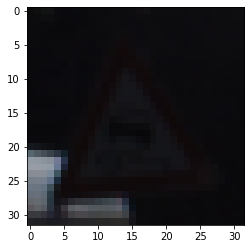

In [ ]:
index=np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print("image label={}".format(y_train[index]))

In [ ]:
from sklearn.utils import shuffle
x_train, y_train=shuffle(x_train,y_train)
def preprocessing(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.equalizeHist(img)
  img=img/255
  return img

In [ ]:
x_train_processed=np.array(list(map(preprocessing,x_train)))
x_validation_processed=np.array(list(map(preprocessing,x_validation)))
x_test_processed=np.array(list(map(preprocessing,x_test)))

In [ ]:
x_train_processed=x_train_processed.reshape(34799,32,32,1)
x_test_processed=x_test_processed.reshape(12630,32,32,1)
x_validation_processed=x_validation_processed.reshape(4410,32,32,1)


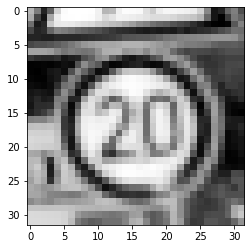

In [ ]:
i=random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(), cmap='gray')

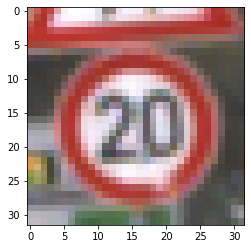

In [ ]:
plt.imshow(x_train[i].squeeze())

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(32,32,1)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(64,(5,5), activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256,activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(43,activation='softmax'))

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2cbf78a450>>

In [ ]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history=model.fit(x_train_processed,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(x_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 32s 37ms/step - loss: 3.5758 - accuracy: 0.0571 - val_loss: 3.4816 - val_accuracy: 0.1184
Epoch 2/50
70/70 [==============================] - 2s 25ms/step - loss: 3.2967 - accuracy: 0.1534 - val_loss: 3.0784 - val_accuracy: 0.3279
Epoch 3/50
70/70 [==============================] - 2s 25ms/step - loss: 2.7474 - accuracy: 0.3130 - val_loss: 2.4312 - val_accuracy: 0.4245
Epoch 4/50
70/70 [==============================] - 2s 25ms/step - loss: 2.2308 - accuracy: 0.4167 - val_loss: 1.9633 - val_accuracy: 0.4937
Epoch 5/50
70/70 [==============================] - 2s 25ms/step - loss: 1.8927 - accuracy: 0.4815 - val_loss: 1.6449 - val_accuracy: 0.5594
Epoch 6/50
70/70 [==============================] - 2s 26ms/step - loss: 1.6381 - accuracy: 0.5351 - val_loss: 1.4081 - val_accuracy: 0.6141
Epoch 7/50
70/70 [==============================] - 2s 25ms/step - loss: 1.4458 - accuracy: 0.5815 - val_loss: 1.2153 - val_accuracy: 0.6807
Epoch 8/50
7

In [ ]:
score=model.evaluate(x_test_processed,y_test)

395/395 [==============================] - 1s 4ms/step - loss: 0.3044 - accuracy: 0.9197


In [ ]:
print('Test Accuracy is:', score[1])

Test Accuracy is: 0.9197149872779846


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

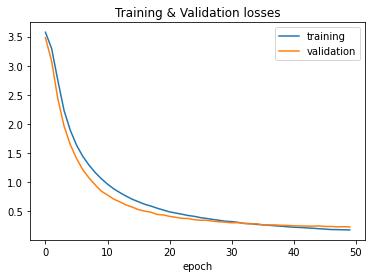

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training & Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

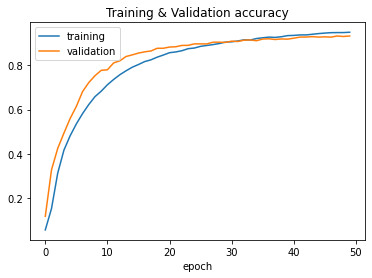

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training & Validation accuracy')
plt.xlabel('epoch')

In [ ]:
prediction=model.predict(x_test_processed) 
classes_x=np.argmax(prediction,axis=1)
y_true_label=y_test

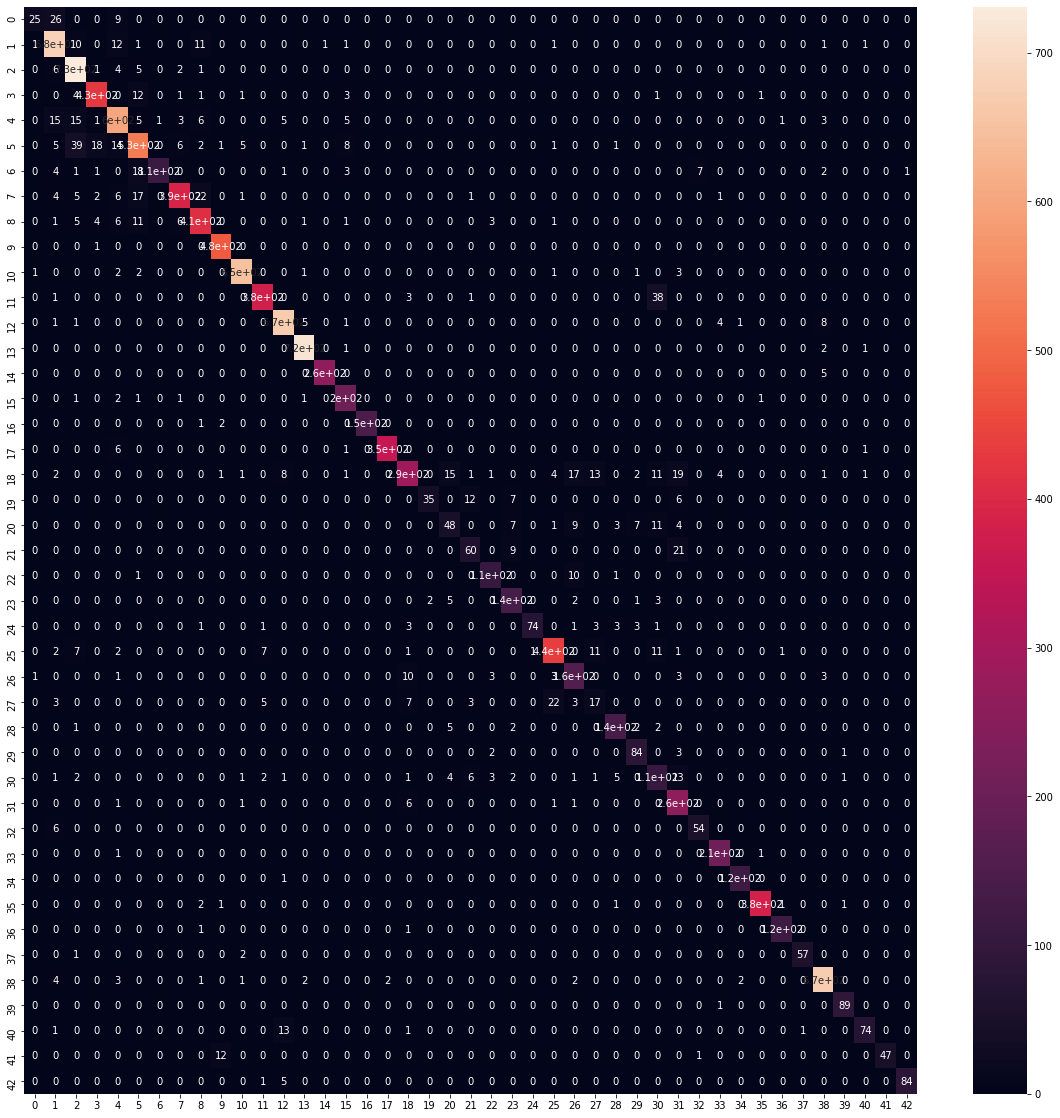

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_true_label, classes_x)
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot=True)

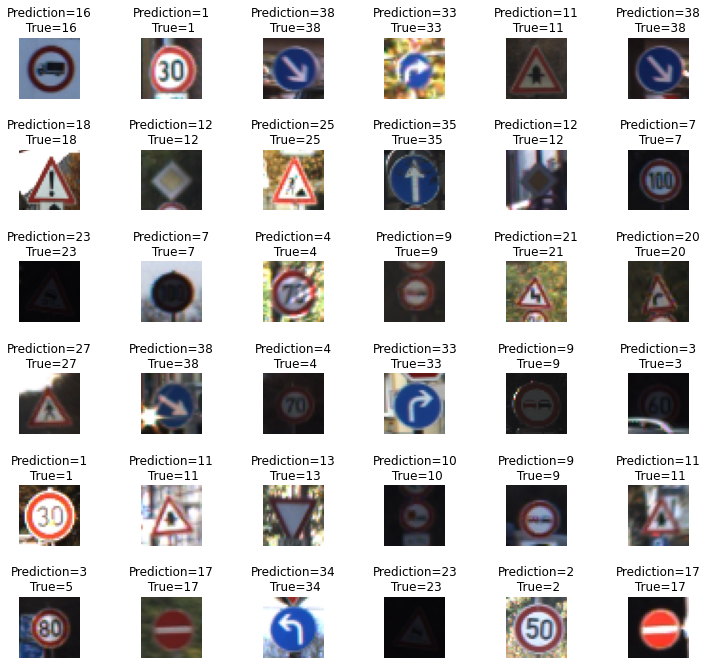

In [ ]:
l=6
w=6


fig, axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in range(0,l*w):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(classes_x[i],y_true_label[i]))
  axes[i].axis('off')
  plt.subplots_adjust(wspace=1)

In [ ]:
model.save('traffic_sign.h5')